## Машинное обучение 1, ПМИ ФКН ВШЭ

## Практическое домашнее задание 1

### Общая информация

Дата выдачи: 25.09.2024

Мягкий дедлайн: 23:59MSK 06.10.2024

Жесткий дедлайн: 23:59MSK 10.10.2024

### О задании

Задание состоит из двух разделов, посвященных работе с табличными данными с помощью библиотеки `polars` и визуализации с помощью `matplotlib`. В первом разделе вам предстоит выполнить базовые задания с помощью вышеуказанных библиотек, а во втором распределить студентов по курсам. Баллы даются за выполнение отдельных пунктов. Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Задание направлено на освоение jupyter notebook (будет использоваться в дальнейших заданиях), библиотек polars и matplotlib.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов без учёта бонусов. Сдавать задание после жёсткого дедлайна нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно получить у семинариста или ассистента. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате `homework-practice-01-polars-Username.ipynb`, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

## 0. Введение

Сейчас мы находимся в jupyter-ноутбуке (или ipython-ноутбуке). Это удобная среда для написания кода, проведения экспериментов, изучения данных, построения визуализаций и других нужд, не связанных с написанием production-кода.

Ноутбук состоит из ячеек, каждая из которых может быть либо ячейкой с кодом, либо ячейкой с текстом размеченным и неразмеченным. Текст поддерживает markdown-разметку и формулы в Latex.

Для работы с содержимым ячейки используется *режим редактирования* (*Edit mode*, включается нажатием клавиши **Enter** после выбора ячейки), а для навигации между ячейками искользуется *командный режим* (*Command mode*, включается нажатием клавиши **Esc**). Тип ячейки можно задать в командном режиме либо с помощью горячих клавиш (**y** to code, **m** to markdown, **r** to edit raw text), либо в меню *Cell -> Cell type*.

После заполнения ячейки нужно нажать *Shift + Enter*, эта команда обработает содержимое ячейки: проинтерпретирует код или сверстает размеченный текст.

In [1]:
# ячейка с кодом, при выполнении которой появится output
2 + 2

4

Ячейка с неразмеченыным текстом.

Попробуйте создать свои ячейки, написать какой-нибудь код и текст какой-нибудь формулой.

In [2]:
# your code
import gc
# будет гарбаге коллектор

[Здесь](https://athena.brynmawr.edu/jupyter/hub/dblank/public/Jupyter%20Notebook%20Users%20Manual.ipynb) находится <s>не</s>большая заметка о используемом языке разметки Markdown. Он позволяет:

0. Составлять упорядоченные списки
1. Выделять *текст* <s>при</s> **необходимости**
2. Добавлять [ссылки](http://imgs.xkcd.com/comics/the_universal_label.png)


* Составлять неупорядоченные списки

Делать вставки с помощью LaTex:
    
$
\left\{
\begin{array}{ll}
x = 16 \sin^3 (t) \\
y = 13 \cos (t) - 5 \cos (2t) - 2 \cos (3t) - \cos (4t) \\
t \in [0, 2 \pi]
\end{array}
\right.$

А ещё можно вставлять картинки, или гифки, или что захотите:

<img src="https://i.imgur.com/k5df8lX.gif" width="400px">



### Google Colab

Что за колаб?

**Google Colab (Colaboratory)** это **Jupyter Notebook + Cloud + Google Drive.**

Компания Google предоставляет возможность бесплатно запускать ноутбуки (предварительно загрузив их на свой гугл-диск) прямо в облаке. При этом вам не требуется установка никаких пакетов на свою машину, а работать можно прямиком из браузера. Вот ссылка:

https://colab.research.google.com

При использовании вы увидите много сходств с jupyter ноутбуком. Одним из преимуществ является доступность GPU, соответствующую опцию можно активировать в настройках сервиса. При желании вы сможете найти в интернете много туториалов по использованию или разобраться самостоятельно =)

### Kaggle

Альтернативой является **Kaggle**, он же площадка для самых разных соревнований по машинному обучению

Он, как и колаб, предоставляет бесплатный GPU, и даже не один, с чётким лимитом в 30 часов в неделю (colab может его внезапно отобрать, kaggle - нет) более мощные CPU с большим числом ядер, и больше Гб ОЗУ (раз так в 2.5)

https://www.kaggle.com

К сожалению мир не идеален, недостатки следующие:
- необходимость загружать датасеты через специальную кнопочку
- невозможность использовать свои скрипты и модули :(
- нужно тыкать техподдержку, чтобы создать аккаунт из России

## 1. Табличные данные и Polars

Эта версия домашки предполагает, что вы уже являетесь уверенным пользователем `pandas` и знакомы с датафреймами, как они устроены и как ими манипулировать. Библиотека `polars` основана на тех же концептах.

Главные достоинства, которые чуть позже продемонстрируем:
- он написан на Rust, поэтому почти все операции в нём выполняются значительно быстрее, есть распараллеливание из коробки, автоматическая оптимизация запросов и пр
- он позволяет работать с данными, которые не помещаются в оперативку, с этим поможет `pl.LazyFrame` и streaming
- конечно же имеются дополнительные функции, которых в `pandas` нет, но очень хочется, например агрегации с расширяющимся окном, произвольные оконные функции и прочее, для этого есть крайне гибкая штука `pl.Expr`

Подробнее можете прочитать на [любом](https://habr.com/ru/articles/710240/) [ресурсе](https://realpython.com/polars-python/), [посвящённом](https://blog.jetbrains.com/pycharm/2024/07/polars-vs-pandas/) [`polars`](https://habr.com/ru/companies/spectr/articles/738766/)

В этой части потребуется выполнить несколько небольших заданий. Можно пойти двумя путями: сначала изучить материалы, а потом приступить к заданиям, или же разбираться "по ходу". Выбирайте сами

Если не понятно, как вызывать конкретный метод, обратитесь к материалам ниже. Имейте в виду, что синтаксис `polars` отличается от привычного нампаевского.
Скорее всего все ваши самые извращённые фантазии уже как-то реализованы в `polars`, поэтому читайте внимательно. Ну и конечно гуглить не запрещено, но желательно прикладывать источник

Материалы:
1. [Getting started](https://docs.pola.rs/user-guide/getting-started/#reading-writing) из официального руководства
2. [Документация](https://docs.pola.rs/api/python/stable/reference/index.html) со всем необходимым
3. [Модификация для Data Science](https://polars-ds-extension.readthedocs.io/en/latest/index.html), вам скорее всего не понадобится в данном задании, но имейте в виду

Многие из заданий можно выполнить несколькими способами. Не существуют единственно верного, но попробуйте максимально задействовать арсенал polars и ориентируйтесь на простоту и понятность вашего кода. Мы не будем подсказывать, что нужно использовать для решения конкретной задачи, попробуйте находить необходимый функционал сами (название метода чаще всего очевидно)

In [3]:
# поларс относительно молодой, имейте в виду, что что-то может сломаться, если будете менять версию
!pip install -qU hvplot xlsx2csv polars==1.5.0

In [4]:
import polars as pl

Скачаем данные:

In [5]:
!wget  -O 'end_seminar.xlsx' -q 'https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=0'

Для пользователей Windows: скачайте файл самостоятельно и поместите его в папку с тетрадкой. Или попробуйте один из следующих вариантов:

In [6]:
# !powershell iwr -outf somefile https://somesite/somefile

In [7]:
# !pip install wget
# import wget
# wget.download('https://dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=1', 'end_seminar.xlsx')

### 📌 **Обязательно прочитайте блок ниже**

> Пандасом и нампаем пользоваться неельзяя... Совсем

> В первой части задания (до раздела "Распределение студентов по курсам") использование циклов запрещается и повлечет за собой снижение оценки. Во второй уже можно, но с оговорками, о чём ниже

> Циклами в данном случае считается `for`, `while` и map-методы `polars`, где можно использовать лямбда-функцию. Главным образом `map_elements` и его производные.
И как правило, всё то, что не умеет делать `pl.LazyFrame` - список [здесь](https://docs.pola.rs/api/python/stable/reference/lazyframe/index.html). Мотивация следующая - используя встроенные функции и методы, `polars` может оптимизировать ваш запрос и провести все нужные манипуляции, прежде чем сериализовать и вывести ответ (за некоторыми исключениями), поэтому важно научиться с этим управляться

> Чтобы сделать выбор `polars` осмысленным, мы немножко модифицируем исходный датасет. Он будет больше в несколько раз и может не влезть в память, если у вас меньше 8 Гб, а с учётом преобразований может потребоваться до 64 Гб! Не пренебрегайте возможностями `pl.LazyFrame`. Его использование не обязательно, но может сильно облегчить вам жизнь

> Трансформировать датасет `df` можно, как только это потребуется по условию (таких пунктов всего 2), на всякий случай поставим значок 🔄

> Если небрежно обращаться с методами `polars`, вы рискуете крашнуть ядро, взорвать компутер, потерять рассудок... Если вдруг у вас есть тачка или хотите подебажить на исходном датасете, то пожалуйста, но помните про условия выше

> Гарантируется, что задание можно выполнить, имея лишь ресурсы Google Colab (бесплатные), удачи ( ͡° ͜ʖ ͡°)

Для каждой задачи из этого раздела вы должны написать код для получения ответа, а также дать текстовый ответ, если он предполагается.

На некоторые вопросы вы можете получить путём пристального взгляда на таблицу, но это не будет засчитываться. Вы в любом случае должны получить ответ с помощью кода.

### 🐻 Бонус polars. [3 балла]
Бонус за использование `polars` равен вашей оценке за дз, умноженной на коэффициент 1.3, поэтому даже если сделали не всё, не отчаивайтесь)

#### 0. Ещё пара красивых слов

Первые несколько манипуляций мы сделаем за вас, а заодно поясним, в чём тут нюанс

In [8]:
# читаем датафрейм
initial_df = pl.read_excel("end_seminar.xlsx", engine="xlsx2csv")
print(initial_df.shape[0], "rows")
print(initial_df.estimated_size("mb"), "mb")

361 rows
0.14590072631835938 mb


Как видим, он достаточно маленький. С такими объёмами выбор библиотеки это чисто вкусовщина. Давайте немного поднимем ставки

In [9]:
def repeat_df(df: pl.DataFrame | pl.LazyFrame, n: int = 2) -> pl.LazyFrame:
    return (
        df.lazy()
        .select(pl.col("timestamp").unique().sort().repeat_by(n).flatten())
        .join(df.lazy(), on="timestamp", how="left")
    )

Для работы с датафреймами, которые в память не влезают, нам понадобится объект `pl.LazyFrame`. Он представляет из себя схему выполнения вашего запроса, который оптимизируется, бьётся на батчи и параллелится под капотом через StreamingAPI, что для нас просто идеально. Перевести объект туда можно через метод `lazy`, обратно через `collect`. Учтите, что `streaming=True` работает не со всеми операциями, применяйте с умом, это можно проверить через `pl.LazyFrame.explain(streaming=True)`

In [10]:
repeat_n = 2

repeated_df = repeat_df(initial_df, repeat_n)
print("Schema")
print(repeated_df.explain(streaming=True, optimized=True))

Schema
LEFT JOIN:
LEFT PLAN ON: [col("timestamp")]
   SELECT [col("timestamp").unique().sort(asc).repeat_by([dyn int: 2]).explode()] FROM
    STREAMING:
      DF ["timestamp", "id", "rating", "18_group"]; PROJECT 1/16 COLUMNS; SELECTION: None
RIGHT PLAN ON: [col("timestamp")]
  DF ["timestamp", "id", "rating", "18_group"]; PROJECT */16 COLUMNS; SELECTION: None
END LEFT JOIN


In [11]:
# как видим, повторы работают
repeated_df = repeated_df.collect()
assert repeated_df.shape[0] == initial_df.shape[0] * repeat_n
print(repeated_df.shape[0], "rows")
print(repeated_df.estimated_size("mb"), "mb")

722 rows
0.2917900085449219 mb


Теперь ещё интереснее. Если бы наш датасет был не в 2 раза больше, а в 100000 раз, что бы мы делали? К счастью для нас, поларс может уместить 300кк строк всего лишь в 512Мб, и это даже не прикол, но работать с этим придётся немного иначе

In [12]:
N = 100000

df = repeat_df(initial_df, N)
print(initial_df.estimated_size("gb") * N, "gb")

14.248117804527283 gb


Поэтому даже такая тривиальная задача, как подсчёт строк становится уже не такой простой. Про это и будет дз

In [13]:
try:
    print(df.shape[0], "rows")
except AttributeError:
    print("ой, не получилось...")

# df.collect().shape[0] # тоже можно, если влезет
# len(df.collect().to_pandas()) # а такое может крашнуть ядро, попробуйте, хехе...

ой, не получилось...


In [14]:
def lazy_len(df: pl.LazyFrame) -> int:
    return df.select(pl.len()).collect().item()


rows = lazy_len(df)  # намного экономнее, потому что оптимизировано под капотом
assert rows == initial_df.shape[0] * N
print(rows, "rows")

36100000 rows


#### 1. [0.5 баллов] Откройте файл с таблицей (не забудьте про её формат). Выведите 3 последних строки

Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы? (на это не надо отвечать, просто подумайте об этом)

In [15]:
# your code here
df.tail(3).collect()

timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
str,str,i64,i64,i64,str,str,str,str,str,str,str,f64,str,str,bool
"""2020-05-24 01:23:31""","""9d19b0d5f4fc8d7edc2258406f872c…",695,188,null,"""Безопасность компьютерных сист…","""Язык SQL""","""Высокопроизводительные вычисле…","""Компьютерные сети""","""Дискретная оптимизация""","""Численные методы""",null,0.197309,null,null,null
"""2020-05-24 01:23:31""","""9d19b0d5f4fc8d7edc2258406f872c…",695,188,null,"""Безопасность компьютерных сист…","""Язык SQL""","""Высокопроизводительные вычисле…","""Компьютерные сети""","""Дискретная оптимизация""","""Численные методы""",null,0.197309,null,null,null
"""2020-05-24 01:23:31""","""9d19b0d5f4fc8d7edc2258406f872c…",695,188,null,"""Безопасность компьютерных сист…","""Язык SQL""","""Высокопроизводительные вычисле…","""Компьютерные сети""","""Дискретная оптимизация""","""Численные методы""",null,0.197309,null,null,null


### Ответьте на вопросы:
1. Сколько было уникальных пользователей из групп 18-го года набора, а сколько из групп 17-го года?

In [16]:
df.filter(pl.col("18_group").is_not_null()).select("id").unique().count().collect()

id
u32
213


In [17]:
df.filter(pl.col("17_group").is_not_null()).select("id").unique().count().collect()

id
u32
134


2. Есть ли уникальные студенты с равными перцентилями?

In [18]:
df.unique(subset=["id"]).filter(pl.col("percentile").is_duplicated()).collect()

timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
str,str,i64,i64,i64,str,str,str,str,str,str,str,f64,str,str,bool
"""2020-05-14 21:52:43""","""3a7326c9e355a67d3805824ca34c4b…",1457,null,null,"""Statistical Learning Theory""","""Высокопроизводительные вычисле…","""Statistical Learning Theory""","""Символьные вычисления""","""Численные методы""","""Символьные вычисления""","""Да""",0.0,"""173""","""Введение в дифференциальную ге…",null
"""2020-05-18 17:09:23""","""3e106aaef8b24dbb01319c73e14c29…",784,182,null,"""Безопасность компьютерных сист…","""Statistical Learning Theory""","""Матричные вычисления""","""Дискретная оптимизация""","""Промышленное программирование …","""Дополнительные главы прикладно…","""Да""",0.0,null,null,true


Да 2 человека с 0 перцентилем с разных курсов(вполне ожидаемо)

#### 2. [0.5 балла] Есть ли в данных пропуски? В каких колонках? Сколько их в каждой из этих колонок?

Уникальных или нет - не столь важно

In [19]:
df.null_count().collect()

timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,13800000,34300000,0,0,0,0,0,0,200000,0,22300000,22300000,30400000


🔄 Преобразуйте датасет - заполните пропуски пустой строкой для строковых колонок, нулём для числовых и False для булевых (постарайтесь избежать перечисления названий всех столбцов).

In [20]:
# your code here
df = df.with_columns(pl.col(pl.Int64).fill_null(0))
df = df.with_columns(pl.col(pl.Boolean).fill_null(False))
df = df.with_columns(pl.col(pl.String).fill_null(""))

#### 3. [0.5 балла] Посмотрите повнимательнее на колонку 'is_first_time'.

Каково процентное соотношение ответов? Сколько из них "Нет"?

In [21]:
df.group_by("is_first_time").len().with_columns((pl.col("len") / pl.sum("len")).alias("percent")).collect(streaming=True)

is_first_time,len,percent
str,u32,f64
"""Да""",30800000,0.853186
"""""",200000,0.00554
"""Нет""",5100000,0.141274


🔄 Оставьте только самую позднюю версию обращений студентов и сохраните изменения

In [22]:
# your code here
df = df.group_by("id").last()

#### 4. [0.5 балла] Какие  blended-курсы для четверокурсников существуют? На какой blended-курс записалось наибольшее количество студентов? На каком из курсов собрались студенты с самым высоким средним рейтингом?

In [23]:
df.group_by("blended").agg(pl.mean("rating")).sort('rating', descending=True).collect()

blended,rating
str,f64
"""Введение в дифференциальную ге…",1210.733333
"""DevOps""",1154.172414
"""Соревновательный анализ данных""",1144.21875
"""""",633.901408


In [24]:
df.group_by("blended").agg(pl.len()).sort('len', descending=True).collect()

blended,len
str,u32
"""""",213
"""DevOps""",87
"""Соревновательный анализ данных""",32
"""Введение в дифференциальную ге…",15


Наибольшее число записалось на devops, а с наибольшим рейтингом на

In [25]:
df.group_by("blended").agg(pl.mean("rating")).sort('rating', descending=True).collect().item(0, "blended")

'Введение в дифференциальную геометрию'

#### 5. [1 балл] Выясните, есть ли студенты с абсолютно одинаковыми предпочтениями по всем курсам.

Для этого сформируйте таблицу, где для каждого возможного набора курсов посчитано количество студентов, выбравших такой набор, и оставьте только строки где это количество больше 1.

В данном случае набор курсов задается упорядоченным множеством ('fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended'). Элемент blended будет нулевым для 3-го курса.

In [26]:
# your code here
courses = ['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended']
print(df.group_by(courses).agg(pl.len().alias('student_count')).filter(pl.col('student_count') > 1).collect())

shape: (15, 8)
┌────────────┬────────────┬────────────┬────────────┬────────────┬───────────┬─────────┬───────────┐
│ fall_1     ┆ fall_2     ┆ fall_3     ┆ spring_1   ┆ spring_2   ┆ spring_3  ┆ blended ┆ student_c │
│ ---        ┆ ---        ┆ ---        ┆ ---        ┆ ---        ┆ ---       ┆ ---     ┆ ount      │
│ str        ┆ str        ┆ str        ┆ str        ┆ str        ┆ str       ┆ str     ┆ ---       │
│            ┆            ┆            ┆            ┆            ┆           ┆         ┆ u32       │
╞════════════╪════════════╪════════════╪════════════╪════════════╪═══════════╪═════════╪═══════════╡
│ Моделирова ┆ Сбор и     ┆ Безопаснос ┆ Компьютерн ┆ Дополнител ┆ Системы   ┆         ┆ 2         │
│ ние        ┆ обработка  ┆ ть компьют ┆ ые сети    ┆ ьные главы ┆ баз       ┆         ┆           │
│ временных  ┆ данных с   ┆ ерных      ┆            ┆ прикладно… ┆ данных    ┆         ┆           │
│ рядов      ┆ помо…      ┆ сист…      ┆            ┆            ┆          

#### 6. [0.5 балла] Найдите курсы по выбору, на которые записывались как студенты 18-го года набора, так и студенты 17-го года.

In [27]:
courses = ['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended']

group_18_courses = df.filter(pl.col('18_group') > 0).select(pl.concat_list(courses).alias('courses')).explode('courses').unique()
group_17_courses = df.filter(pl.col('17_group') != '').select(pl.concat_list(courses).alias('courses')).explode('courses').unique()

group_18_courses.join(group_17_courses, on='courses', how='inner').collect()

courses
str
"""Моделирование временных рядов"""
"""Сбор и обработка данных с помо…"
"""Безопасность компьютерных сист…"
"""Statistical Learning Theory"""
"""Принятие решений в условиях ри…"
"""Высокопроизводительные вычисле…"
"""Численные методы"""


Методом исключения найдите курсы, которые предлагались только студентам 18-го года и только студентам 17-го года.

In [28]:
group_18_courses.join(group_17_courses, on='courses', how='anti').collect()

courses
str
"""Компьютерные сети"""
"""Теория баз данных"""
"""Промышленное программирование …"
"""Системы баз данных"""
"""Дополнительные главы прикладно…"
…
"""Матричные вычисления"""
"""Язык SQL"""
""""""


In [29]:
group_17_courses.join(group_18_courses, on='courses', how='anti').collect()

courses
str
"""Проектирование и разработка вы…"
"""Генеративные модели в машинном…"
"""Символьные вычисления"""
"""Глубинное обучение в обработке…"
"""Конфликты и кооперация"""
…
"""Обучение с подкреплением"""
"""Введение в дифференциальную ге…"
"""Методы сжатия и передачи медиа…"


### Визуализации

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. Здесь будут описаны ключевые правила оформления графиков для **всех** домашних заданий.

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

В этом задании вы попробуете построить один из них. Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если возможно сделать график интерактивным, это обычно того стоит - помогает решить проблемы с читаемостью;
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
- сетка на графике помогает оценить значения в точках на глаз, это обычно полезно, поэтому лучше ее отрисовывать;
- если распределение на гистограмме имеет тяжёлые хвосты, лучше использовать логарифмическую шкалу.

Еще одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё.

У `polars` уже есть встроенные инструменты для визуализации, в частности интерактивные на базе [hvplot](https://docs.pola.rs/user-guide/misc/visualization/#plotly). Из её преимуществ - хорошая производительность при работе с большими данными, есть поддержка самых популярных видов графиков, но синтаксис не самый удобный

#### 7. [0.5 балла] Постройте график средних рейтингов по дням получения ответов (bar plot).

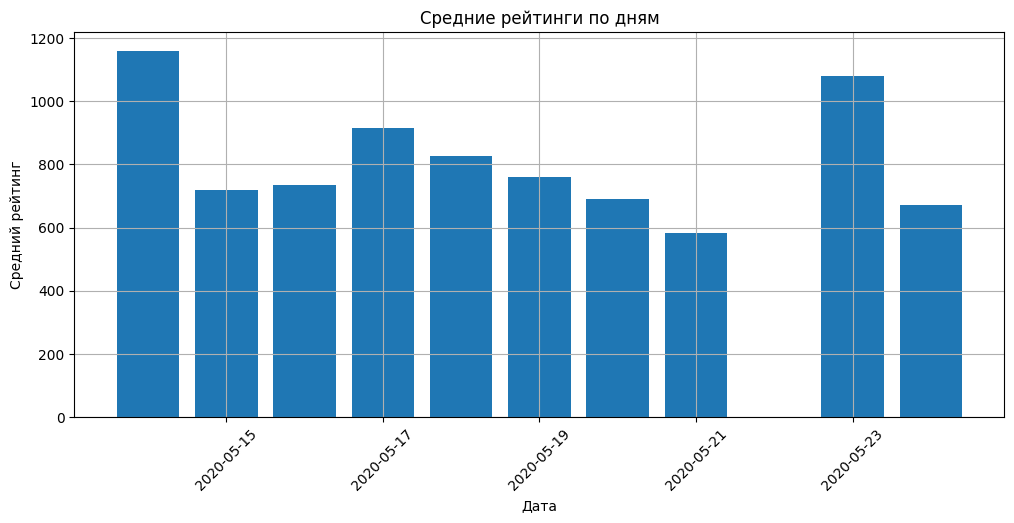

In [30]:
import matplotlib.pyplot as plt
import datetime 

result = (
    df.with_columns(
        pl.col("timestamp").str.strptime(pl.Datetime, "%Y-%m-%d %H:%M:%S").dt.date().alias("date")
    )
    .group_by("date")
    .agg(pl.col("rating").mean().alias("avg_rating"))
    .sort("date")
)

result = result.collect()

dates = result["date"]
average_ratings = result["avg_rating"]

plt.figure(figsize=(12, 5))
plt.title('Средние рейтинги по дням')
plt.xlabel('Дата')
plt.ylabel('Средний рейтинг')
plt.xticks(rotation=45)
plt.grid()
plt.bar(dates, average_ratings)
plt.savefig("avg_rating.pdf")
plt.show()

в общем я не справился чтобы все даты снизу отображались :( кринж какой-то

Сохраните график в формате pdf (так он останется векторизованным) или html (тогда останется интерактивным)

Как известно после show savefig не работает, поэтому см выше

### 2. Распределение студентов по курсам.

<span style="color:red">!!!ВНИМАТЕЛЬНО ИЗУЧИТЕ ТЕКСТ НИЖЕ!!!</span>.

<span style="color:orange">Если во время выполнения заданий у вас вознинут вопросы -- еще раз перечитайте текст целиком, скорее всего ответы уже содержатся в нем.</span>

Теперь вам нужно распределить студентов по осенним курсам по выбору, учитывая их предпочтения.

## 📌 **Алгоритм распределения студентов по курсам**:
1. По умолчанию на каждой дисциплине по выбору у 3 и 4 курсов может учиться 1 группа (до 30 студентов). Исключения описаны ниже. На blended-дисциплинах для четверокурсников количество мест не ограничено.
2. Проводится первая волна отбора. Для каждой дисциплины формируется список тех, кто указал её первым приоритетом (если студент должен выбрать два курса по выбору, то для него дисциплины, которые он указал первым и вторым приоритетом, рассматриваются как дисциплины первого приоритета). Если желающих больше, чем мест, то выбирается топ по перцентилю рейтинга.
3. На дисциплинах, где остались места после первой волны, формируются списки тех, кто выбрал их вторым приоритетом, и места заполняются лучшими по перцентили рейтинга студентами. После этого проводится такая же процедура для дисциплин третьего приоритета.
4. Если студент не попал на необходимое количество курсов по итогам трёх волн, с ним связывается учебный офис и решает вопрос в индивидуальном порядке.

## ☝️ **Обращаем ваше внимание на следующие детали:**

- Конкурс на каждый курс общий для 3-го и 4-го курса

- По умолчанию студент выбирает один осенний и один весенний курс по выбору, а также четверокурсники выбирают один blended-курс. Студенты групп 17-го года специализаций МОП и ТИ выбирают по 2 осенних и 2 весенних курса по выбору, также студенты групп 18' специализации МИ выбирают 2 осенних курса. <i>Для студентов, которые выбирают 2 курса (например, осенних) первый приоритет — <code>fall_1</code> и <code>fall_2</code>, второй приоритет — <code>fall_3</code>. Такие студенты участвуют только в двух волнах отбора</i>.

- Студенты специализации МОП не могут выбрать весенним курсом по выбору Машинное обучение 2. **Если студент специализации МОП выбрал Машинное обучение 2, то его приоритеты сдвигаются.** Из-за совпадений первого и второго курса по выбору двигать приоритеты не надо.

- Blended-курсы не трогайте, по ним не надо распределять, на другие курсы они никак не влияют.

- Заведомо известно, что в процессе распределения не возникнет ситуации, когда на одно место претендуют студенты с одинаковым перцентилем.

- Постарайтесь воздержаться от использования циклов там, где это возможно. <i>Допустимо итерироваться по <b>курсам</b>, на которые проводится отбор, и по <b>волнам</b> отбора. Если вы придумаете, как обойтись и без этих циклов, то на усмотрение проверяющего могут быть добавлены бонусные баллы. <b>Дублирование кода не признается успешным избавлением от циклов</b></i>

- На выходе ожидается файл res_fall.csv с результатами распределения на осенние курсы по выбору. Файл должен быть следующего формата:

    * три столбца: ID, course1, course2
    
    * Если студент не попал на курс, но должен был, то вместо названия курса в ячейке должна быть строка "???"
    
    * Если студент должен выбрать только один курс, то в колонке course2 для него должна стоять строка "-"

    * Если студент должен выбрать два курса по выбору, то порядок в колонках course1 и course2 не важен.
    
    * Формат csv: для сохранения воспользуйтесь `df.write_csv('solution.csv')`

Для работы вам могут понадобиться следующие данные:

- Результаты опроса (вы уже использовали этот файл в первой части задания, но на всякий случай ссылка: https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=0)

- Соответствие номеров групп специализациям:

    * 171, 172 - МОП; 173 - ТИ; 174 — АДИС; 175, 176 — РС; 177 — АПР
    
    * У студентов 18-го года номера групп соответствуют номерам до распределения по специализациям. Это означает, что по номеру группы 18* нельзя однозначно определить специализацию студента. При этом в рамках распределения важно знать информацию только о двух из них: МОП и МИ. Эти знание можно получить из колонок 'is_ml_student ' и 'is_mi' соответственно.

- Ограничения по количеству мест на курсах по выбору:

    * Осенние: везде 30 мест, кроме Statistical Learning Theory (60 мест), Высокопроизводительных вычислений (60 мест), Анализа неструктурированных данных ($\infty$ мест)

    * Весенние: везде 30 мест, кроме Обучения с подкреплением (60 мест), Анализа данных в бизнесе (60 мест).


Кстати, убедитесь, что в данных больше нет пропусков и повторных записей и сериализуйте датафрейм

#### 0. Проверка

Для начала давайте убедимся, что вы успешно выполнили задания первой части и проверим ваши данные на наличие пропусков и повторов:

In [31]:
df = df.collect(streaming=True)

assert df.shape[0] == 347, "В таблице остались повторы или потеряны данные"
assert df.null_count().sum_horizontal().item() == 0, "В таблице остались пропуски"

Если вы не получили AssertionError, то можете продолжать.

#### 1. [1 балл] Создайте новый признак, обозначающий, сколько осенних курсов должен выбрать студент

В этом вам может помочь информация о специализации и группе студента.

In [32]:
df = df.with_columns(
    pl.when(
        (pl.col('18_group') > 0) &
        (pl.col('is_mi') == True)
    ).then(2)
    .when(
        (pl.col('17_group').is_in(['171', '172', '173']))
    ).then(2)
    .otherwise(1)
    .alias('fall_courses_required')
)

Проверка:

In [33]:
cnt_fall_col_name = 'fall_courses_required'

ids = [
    "2662600c2c37e11e62f6ee0b88452f22",
    "d555d2805e1d93d4f023e57dc4c8f403",
    "8fe79f84f36e3a5d2d6745621321302c",
    "e4caca755ee0bdd711e18fb8084958b5",
]
assert (
    df.filter(pl.col("id").is_in(ids)).sort("id")[cnt_fall_col_name] == [2, 1, 2, 1]
).all()

#### 2. [2 балла] Распределите студентов в соответствии с первым приоритетом

In [34]:
fall_course_60 = [
    'Statistical Learning Theory',
    'Высокопроизводительные вычисления'
]

unlimited_course = 'Анализ неструктурированных данных'

default_limit = 30

In [35]:
cnt_places_fall_wave_1 = df.select(course=pl.concat_list(pl.col('^fall_.$'))).explode('course').filter(pl.col('course') != '').unique().with_columns(
        pl.when(pl.col('course').is_in(fall_course_60))
        .then(60)
        .when(pl.col('course') == unlimited_course)
        .then(df.shape[0])
        .otherwise(default_limit)
        .alias("course_limit"))
cnt_places_fall_wave_1

course,course_limit
str,i32
"""Байесовские методы машинного о…",30
"""Язык SQL""",30
"""Глубинное обучение в обработке…",30
"""Теория баз данных""",30
"""Высокопроизводительные вычисле…",60
…,…
"""Безопасность компьютерных сист…",30
"""Моделирование временных рядов""",30
"""Statistical Learning Theory""",60


In [36]:
first_priority = df.with_columns(
    pl.when(pl.col(cnt_fall_col_name) == 1)
    .then(pl.concat_list(pl.col('fall_1')))
    .otherwise(pl.concat_list(pl.col('fall_1'), pl.col('fall_2')).list.unique()).alias('course'))
first_priority

id,timestamp,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,fall_courses_required,course
str,str,i64,i64,i64,str,str,str,str,str,str,str,f64,str,str,bool,i32,list[str]
"""b121e4d7d62387cd5199cca464a34a…","""2020-05-16 15:01:06""",694,185,0,"""Безопасность компьютерных сист…","""Теория баз данных""","""Язык SQL""","""Машинное обучение 2""","""Компьютерные сети""","""Промышленное программирование …","""Нет""",0.204036,"""""","""""",false,1,"[""Безопасность компьютерных систем""]"
"""cd8299f4173e8a509275b25787670a…","""2020-05-18 18:30:23""",704,181,0,"""Безопасность компьютерных сист…","""Высокопроизводительные вычисле…","""Язык SQL""","""Дискретная оптимизация""","""Машинное обучение 2""","""Промышленное программирование …","""Да""",0.161435,"""""","""""",false,1,"[""Безопасность компьютерных систем""]"
"""f81cc449798c2d8971612dc9a749ad…","""2020-05-18 22:09:23""",637,186,0,"""Высокопроизводительные вычисле…","""Язык SQL""","""Моделирование временных рядов""","""Компьютерные сети""","""Анализ данных в бизнесе""","""Дискретная оптимизация""","""Нет""",0.470852,"""""","""""",false,1,"[""Высокопроизводительные вычисления""]"
"""3e106aaef8b24dbb01319c73e14c29…","""2020-05-18 17:09:23""",784,182,0,"""Безопасность компьютерных сист…","""Statistical Learning Theory""","""Матричные вычисления""","""Дискретная оптимизация""","""Промышленное программирование …","""Дополнительные главы прикладно…","""Да""",0.0,"""""","""""",true,1,"[""Безопасность компьютерных систем""]"
"""1c91e6c5375cf4a1cba48bdca79f7a…","""2020-05-18 23:22:00""",714,186,0,"""Сбор и обработка данных с помо…","""Язык SQL""","""Матричные вычисления""","""Промышленное программирование …","""Дополнительные главы прикладно…","""Анализ данных в бизнесе""","""Да""",0.130045,"""""","""""",true,1,"[""Сбор и обработка данных с помощью краудсорсинга""]"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""9f23846141606a1e26e8e4c28e9a72…","""2020-05-18 17:51:56""",527,187,0,"""Безопасность компьютерных сист…","""Сбор и обработка данных с помо…","""Язык SQL""","""Компьютерные сети""","""Промышленное программирование …","""Системы баз данных""","""Да""",0.950673,"""""","""""",false,1,"[""Безопасность компьютерных систем""]"
"""22eda17f96bbf2d0fb857453e61011…","""2020-05-18 22:02:44""",1198,0,0,"""Анализ неструктурированных дан…","""Сбор и обработка данных с помо…","""Безопасность компьютерных сист…","""Обучение с подкреплением""","""Конфликты и кооперация""","""Методы сжатия и передачи медиа…","""Да""",0.347826,"""174""","""DevOps""",false,1,"[""Анализ неструктурированных данных""]"
"""d37fe725a8ee1d1b263463baf7560f…","""2020-05-16 21:43:04""",748,184,0,"""Безопасность компьютерных сист…","""Теория баз данных""","""Высокопроизводительные вычисле…","""Промышленное программирование …","""Компьютерные сети""","""Дискретная оптимизация""","""Да""",0.053812,"""""","""""",false,1,"[""Безопасность компьютерных систем""]"


In [37]:
first_priority = first_priority.explode('course')

In [38]:
fall_wave1_cources = cnt_places_fall_wave_1.join(first_priority, on='course').group_by('course', 'course_limit').agg(pl.col('id', 'percentile').bottom_k_by(by='percentile', k=pl.col('course_limit').max())).with_columns(cnt = pl.col('id').list.len())

In [39]:
fall_wave1_cources

course,course_limit,id,percentile,cnt
str,i32,list[str],list[f64],u32
"""Сбор и обработка данных с помо…",30,"[""86d929f6fd741e56e93cee5900298849"", ""425c2a90f447620c9a1868e92f0a7af6"", … ""3e88c8d53bcd73595d2bbcdd8c51c1bf""]","[0.008969, 0.013453, … 0.637681]",30
"""Теория баз данных""",30,"[""651f2fa7d270b436246ddd7d05880bfa"", ""d6c079f1ff869c8c84fa3ed30bd67e0e"", … ""bb94ed5af639819dac15574197c80da3""]","[0.035874, 0.085202, … 0.923767]",14
"""Анализ неструктурированных дан…",347,"[""7f98e4487c7a910567f2d841e5e764c3"", ""6a93fcbc79d0df6ddeba3b46739fc3d8"", … ""d539461bf254cf8b3201cdf7990b119e""]","[0.050725, 0.07971, … 0.992754]",48
"""Матричные вычисления""",30,"[""e0ca1a9548af9a3f98428c62420aa484"", ""cef7df6fa798b759b2a5763b7d0c5d38"", … ""d9f0e5ebc6718202b86eaee2de1c697b""]","[0.004484, 0.049327, … 0.932735]",15
"""Высокопроизводительные вычисле…",60,"[""3a7326c9e355a67d3805824ca34c4bc5"", ""7fe7df0d207babbf30249b3063ac1f26"", … ""b4f1f195bd1bc63490a7bc42275a71cd""]","[0.0, 0.007246, … 0.919283]",44
…,…,…,…,…
"""Моделирование временных рядов""",30,"[""dc7f705ae386b0457542a833571d51d0"", ""ff549c331d45453052f28ad2614afda9"", … ""c1e88502b6673d22c38ee1352e3a1dd9""]","[0.043478, 0.107623, … 0.971014]",30
"""Язык SQL""",30,"[""93ff79a51cd602f1dd3028ba2c129503"", ""b8dab0479a00af2eb75deaf54dd9a442"", … ""feb53dcdd28fff9dc4a981c3419fea6f""]","[0.183857, 0.188341, … 0.96861]",29
"""Глубинное обучение в обработке…",30,"[""67e4ec4fe5c0601815692fbd6d403fb7"", ""840716fde17a536f5e067546ab49a8a7"", … ""d555d2805e1d93d4f023e57dc4c8f403""]","[0.014493, 0.028986, … 0.963768]",23


In [40]:
fall_wave1_cources = fall_wave1_cources.explode('id', 'percentile')
fall_wave1_cources

course,course_limit,id,percentile,cnt
str,i32,str,f64,u32
"""Сбор и обработка данных с помо…",30,"""86d929f6fd741e56e93cee59002988…",0.008969,30
"""Сбор и обработка данных с помо…",30,"""425c2a90f447620c9a1868e92f0a7a…",0.013453,30
"""Сбор и обработка данных с помо…",30,"""a0c56e8aa03ea6c1f5e84629144720…",0.044843,30
"""Сбор и обработка данных с помо…",30,"""1c91e6c5375cf4a1cba48bdca79f7a…",0.130045,30
"""Сбор и обработка данных с помо…",30,"""8a1162ce3c94d8974210a24f4b4f5f…",0.147982,30
…,…,…,…,…
"""Байесовские методы машинного о…",30,"""eb1d7205d913319ef3d48e07198398…",0.608696,24
"""Байесовские методы машинного о…",30,"""276e2ccf4903d4ddf856b20a2b0839…",0.623188,24
"""Байесовские методы машинного о…",30,"""3e88c8d53bcd73595d2bbcdd8c51c1…",0.637681,24


In [41]:
first_place = fall_wave1_cources.group_by('course').first().select('id').unique().with_columns(is_first_place=True)
last_place = fall_wave1_cources.group_by('course').last().select('id').unique().with_columns(is_last_place=True)

In [42]:
df_wave_1 = fall_wave1_cources.group_by('id').agg(course1=pl.col('course').min(), course2=pl.when(pl.col('course').len() > 1).then(pl.col('course')).max()).join(first_place, on='id', how='left').join(last_place, on='id', how='left').join(df, on='id', how='right')
df_wave_1

course1,course2,is_first_place,is_last_place,id,timestamp,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,fall_courses_required
str,str,bool,bool,str,str,i64,i64,i64,str,str,str,str,str,str,str,f64,str,str,bool,i32
"""Безопасность компьютерных сист…",null,null,null,"""b121e4d7d62387cd5199cca464a34a…","""2020-05-16 15:01:06""",694,185,0,"""Безопасность компьютерных сист…","""Теория баз данных""","""Язык SQL""","""Машинное обучение 2""","""Компьютерные сети""","""Промышленное программирование …","""Нет""",0.204036,"""""","""""",false,1
"""Безопасность компьютерных сист…",null,null,null,"""cd8299f4173e8a509275b25787670a…","""2020-05-18 18:30:23""",704,181,0,"""Безопасность компьютерных сист…","""Высокопроизводительные вычисле…","""Язык SQL""","""Дискретная оптимизация""","""Машинное обучение 2""","""Промышленное программирование …","""Да""",0.161435,"""""","""""",false,1
"""Высокопроизводительные вычисле…",null,null,null,"""f81cc449798c2d8971612dc9a749ad…","""2020-05-18 22:09:23""",637,186,0,"""Высокопроизводительные вычисле…","""Язык SQL""","""Моделирование временных рядов""","""Компьютерные сети""","""Анализ данных в бизнесе""","""Дискретная оптимизация""","""Нет""",0.470852,"""""","""""",false,1
"""Безопасность компьютерных сист…",null,true,null,"""3e106aaef8b24dbb01319c73e14c29…","""2020-05-18 17:09:23""",784,182,0,"""Безопасность компьютерных сист…","""Statistical Learning Theory""","""Матричные вычисления""","""Дискретная оптимизация""","""Промышленное программирование …","""Дополнительные главы прикладно…","""Да""",0.0,"""""","""""",true,1
"""Сбор и обработка данных с помо…",null,null,null,"""1c91e6c5375cf4a1cba48bdca79f7a…","""2020-05-18 23:22:00""",714,186,0,"""Сбор и обработка данных с помо…","""Язык SQL""","""Матричные вычисления""","""Промышленное программирование …","""Дополнительные главы прикладно…","""Анализ данных в бизнесе""","""Да""",0.130045,"""""","""""",true,1
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
null,null,null,null,"""9f23846141606a1e26e8e4c28e9a72…","""2020-05-18 17:51:56""",527,187,0,"""Безопасность компьютерных сист…","""Сбор и обработка данных с помо…","""Язык SQL""","""Компьютерные сети""","""Промышленное программирование …","""Системы баз данных""","""Да""",0.950673,"""""","""""",false,1
"""Анализ неструктурированных дан…",null,null,null,"""22eda17f96bbf2d0fb857453e61011…","""2020-05-18 22:02:44""",1198,0,0,"""Анализ неструктурированных дан…","""Сбор и обработка данных с помо…","""Безопасность компьютерных сист…","""Обучение с подкреплением""","""Конфликты и кооперация""","""Методы сжатия и передачи медиа…","""Да""",0.347826,"""174""","""DevOps""",false,1
"""Безопасность компьютерных сист…",null,null,null,"""d37fe725a8ee1d1b263463baf7560f…","""2020-05-16 21:43:04""",748,184,0,"""Безопасность компьютерных сист…","""Теория баз данных""","""Высокопроизводительные вычисле…","""Промышленное программирование …","""Компьютерные сети""","""Дискретная оптимизация""","""Да""",0.053812,"""""","""""",false,1


Здесь для проверки приведена таблица, в которой есть 2 дополнительные колонки:
    
    1) is_first_place - является ли студент лучшим по перцентили хотя бы на одном из курсов, куда он был зачислен
    (True / NaN)
    
    2) is_last_place  - является ли студент худшим по перцентили хотя бы на одном из курсов, куда он был зачислен (True / NaN)

In [43]:
!wget  -O '2_task_check.csv' -q 'https://www.dropbox.com/s/v8o2zzq3iz5gc9w/_2_task_check.csv?dl=0'
check_df = pl.read_csv('2_task_check.csv')

После распределения студентов в соответствии с первым приоритетом добавьте в свой датафрейм аналогичные признаки и запустите проверку:

In [44]:
fir_col_name =  'is_first_place'
last_col_name =  'is_last_place'

assert (
    check_df.sort("id").select("is_first_place", "is_last_place")
    == df_wave_1.sort("id").select(fir_col_name, last_col_name)
).sum().rows() == [(10, 12)]

#### 3. [2 балла] Проведите все три волны отбора студентов на курсы по выбору

In [45]:
needs_second = df_wave_1.filter((pl.concat_list('course1', 'course2').list.drop_nulls().list.len() < pl.col(cnt_fall_col_name)) & (pl.col(cnt_fall_col_name).eq(1) | (pl.col('course1').is_null() | (pl.col('fall_3') != pl.col('course1')))))
second_priority = needs_second.with_columns(
    pl.when(pl.col(cnt_fall_col_name) == 1)
    .then(pl.col('fall_2'))
    .otherwise(pl.col('fall_3'))
    .alias('course'))
second_priority

course1,course2,is_first_place,is_last_place,id,timestamp,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,fall_courses_required,course
str,str,bool,bool,str,str,i64,i64,i64,str,str,str,str,str,str,str,f64,str,str,bool,i32,str
"""Анализ неструктурированных дан…",null,null,null,"""de539be8b29b3afa002184e28d63c6…","""2020-05-18 22:43:06""",1015,0,0,"""Анализ неструктурированных дан…","""Безопасность компьютерных сист…","""Глубинное обучение в обработке…","""Обучение с подкреплением""","""Методы сжатия и передачи медиа…","""Проектирование и разработка вы…","""Да""",0.949275,"""173""","""DevOps""",false,2,"""Глубинное обучение в обработке…"
"""Принятие решений в условиях ри…",null,null,null,"""f2e1cfc27a724879ac2a8c98004c14…","""2020-05-18 18:22:26""",981,0,0,"""Принятие решений в условиях ри…","""Моделирование временных рядов""","""Глубинное обучение в обработке…","""Обучение с подкреплением""","""Компьютерное зрение""","""Методы сжатия и передачи медиа…","""Да""",0.978261,"""173""","""DevOps""",false,2,"""Глубинное обучение в обработке…"
null,null,null,null,"""851497aadac83e844753bb3b2163c7…","""2020-05-18 22:32:20""",654,183,0,"""Безопасность компьютерных сист…","""Высокопроизводительные вычисле…","""Язык SQL""","""Промышленное программирование …","""Компьютерные сети""","""Системы баз данных""","""Да""",0.394619,"""""","""""",false,1,"""Высокопроизводительные вычисле…"
"""Глубинное обучение в обработке…",null,null,null,"""cef24632489091cb8c085688b7d78d…","""2020-05-18 23:54:25""",1095,0,0,"""Глубинное обучение в обработке…","""Сбор и обработка данных с помо…","""Анализ неструктурированных дан…","""Обучение с подкреплением""","""Генеративные модели в машинном…","""Компьютерное зрение""","""Нет""",0.717391,"""172""","""Соревновательный анализ данных""",false,2,"""Анализ неструктурированных дан…"
"""Моделирование временных рядов""",null,null,null,"""bba51e2f648cb3323b96858a404dac…","""2020-05-17 18:29:44""",1052,0,0,"""Сбор и обработка данных с помо…","""Моделирование временных рядов""","""Анализ неструктурированных дан…","""Методы сжатия и передачи медиа…","""Обучение с подкреплением""","""Численные методы""","""Да""",0.862319,"""172""","""Соревновательный анализ данных""",false,2,"""Анализ неструктурированных дан…"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
null,null,null,null,"""efc406545c2b0e958ec89b4c1e4f7a…","""2020-05-19 00:09:12""",615,187,0,"""Безопасность компьютерных сист…","""Язык SQL""","""Высокопроизводительные вычисле…","""Системы баз данных""","""Компьютерные сети""","""Машинное обучение 2""","""Да""",0.58296,"""""","""""",false,1,"""Язык SQL"""
null,null,null,null,"""be4fa2120de3397ae21eac38ff0060…","""2020-05-18 21:12:00""",502,187,0,"""Безопасность компьютерных сист…","""Язык SQL""","""Матричные вычисления""","""Промышленное программирование …","""Численные методы""","""Машинное обучение 2""","""Да""",0.991031,"""""","""""",false,1,"""Язык SQL"""
"""Анализ неструктурированных дан…",null,null,null,"""fa61e55c68763160d0fffe57dab37a…","""2020-05-18 21:09:04""",1121,0,0,"""Анализ неструктурированных дан…","""Безопасность компьютерных сист…","""Сбор и обработка данных с помо…","""Обучение с подкреплением""","""Компьютерное зрение""","""Генеративные модели в машинном…","""Да""",0.630435,"""172""","""DevOps""",false,2,"""Сбор и обработка данных с помо…"


In [46]:
cnt_places_fall_wave_2 = fall_wave1_cources.drop('id', 'percentile').group_by('course').last().with_columns(course_limit=pl.col('course_limit') - pl.col('cnt')).filter(pl.col('course_limit') > 0).drop('cnt')
cnt_places_fall_wave_2

course,course_limit
str,i64
"""Матричные вычисления""",15
"""Байесовские методы машинного о…",6
"""Глубинное обучение в обработке…",7
"""Statistical Learning Theory""",27
"""Высокопроизводительные вычисле…",16
"""Анализ неструктурированных дан…",299
"""Принятие решений в условиях ри…",22
"""Язык SQL""",1
"""Теория баз данных""",16


In [47]:
fall_wave2_cources = cnt_places_fall_wave_2.join(second_priority, on='course').group_by('course', 'course_limit').agg(pl.col('id', 'percentile').bottom_k_by(by='percentile', k=pl.col('course_limit').max())).with_columns(cnt = pl.col('id').list.len())

In [48]:
fall_wave2_cources = fall_wave2_cources.explode('id', 'percentile')
fall_wave2_cources

course,course_limit,id,percentile,cnt
str,i64,str,f64,u32
"""Теория баз данных""",16,"""cddf159101f9a5a30f9041ceebdb28…",0.408072,4
"""Теория баз данных""",16,"""cc8e710c871ae8236b8b8705e68407…",0.834081,4
"""Теория баз данных""",16,"""c97ab5cabace9f00673cc8384771aa…",0.860987,4
"""Теория баз данных""",16,"""bd416140ecdb32b6dbd7f40820bf63…",0.977578,4
"""Высокопроизводительные вычисле…",16,"""31e38f7596f83b72ebba1c6fc6b7a5…",0.23913,16
…,…,…,…,…
"""Анализ неструктурированных дан…",299,"""d7118b44c7e8fdbbaaca226d2da6fe…",0.652174,5
"""Анализ неструктурированных дан…",299,"""cef24632489091cb8c085688b7d78d…",0.717391,5
"""Анализ неструктурированных дан…",299,"""d40cbae8cfc9e6c5d05831ef7e122f…",0.724638,5


In [49]:
df_wave_2_with_multiple = fall_wave2_cources.group_by('id').agg(course1=pl.col('course').min(), course2=pl.when(pl.col('course').len() > 1).then(pl.col('course')).max()).join(df_wave_1, on='id', how='right')
df_wave_2_with_multiple = df_wave_2_with_multiple.with_columns(
    course2=pl.when(pl.col('course1_right').is_not_null() & pl.col('course2_right').is_null())
    .then(pl.col('course1')),
    course1=pl.when(pl.col('course1_right').is_null())
    .then(pl.col('course1')))
df_wave_2 = df_wave_2_with_multiple.with_columns(course1=pl.coalesce([pl.col('course1'), pl.col('course1_right')])).with_columns(course2=pl.coalesce([pl.col('course2'), pl.col('course2_right')])).drop('course1_right', 'course2_right')
df_wave_2

course1,course2,is_first_place,is_last_place,id,timestamp,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,fall_courses_required
str,str,bool,bool,str,str,i64,i64,i64,str,str,str,str,str,str,str,f64,str,str,bool,i32
"""Безопасность компьютерных сист…",null,null,null,"""b121e4d7d62387cd5199cca464a34a…","""2020-05-16 15:01:06""",694,185,0,"""Безопасность компьютерных сист…","""Теория баз данных""","""Язык SQL""","""Машинное обучение 2""","""Компьютерные сети""","""Промышленное программирование …","""Нет""",0.204036,"""""","""""",false,1
"""Безопасность компьютерных сист…",null,null,null,"""cd8299f4173e8a509275b25787670a…","""2020-05-18 18:30:23""",704,181,0,"""Безопасность компьютерных сист…","""Высокопроизводительные вычисле…","""Язык SQL""","""Дискретная оптимизация""","""Машинное обучение 2""","""Промышленное программирование …","""Да""",0.161435,"""""","""""",false,1
"""Высокопроизводительные вычисле…",null,null,null,"""f81cc449798c2d8971612dc9a749ad…","""2020-05-18 22:09:23""",637,186,0,"""Высокопроизводительные вычисле…","""Язык SQL""","""Моделирование временных рядов""","""Компьютерные сети""","""Анализ данных в бизнесе""","""Дискретная оптимизация""","""Нет""",0.470852,"""""","""""",false,1
"""Безопасность компьютерных сист…",null,true,null,"""3e106aaef8b24dbb01319c73e14c29…","""2020-05-18 17:09:23""",784,182,0,"""Безопасность компьютерных сист…","""Statistical Learning Theory""","""Матричные вычисления""","""Дискретная оптимизация""","""Промышленное программирование …","""Дополнительные главы прикладно…","""Да""",0.0,"""""","""""",true,1
"""Сбор и обработка данных с помо…",null,null,null,"""1c91e6c5375cf4a1cba48bdca79f7a…","""2020-05-18 23:22:00""",714,186,0,"""Сбор и обработка данных с помо…","""Язык SQL""","""Матричные вычисления""","""Промышленное программирование …","""Дополнительные главы прикладно…","""Анализ данных в бизнесе""","""Да""",0.130045,"""""","""""",true,1
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
null,null,null,null,"""9f23846141606a1e26e8e4c28e9a72…","""2020-05-18 17:51:56""",527,187,0,"""Безопасность компьютерных сист…","""Сбор и обработка данных с помо…","""Язык SQL""","""Компьютерные сети""","""Промышленное программирование …","""Системы баз данных""","""Да""",0.950673,"""""","""""",false,1
"""Анализ неструктурированных дан…",null,null,null,"""22eda17f96bbf2d0fb857453e61011…","""2020-05-18 22:02:44""",1198,0,0,"""Анализ неструктурированных дан…","""Сбор и обработка данных с помо…","""Безопасность компьютерных сист…","""Обучение с подкреплением""","""Конфликты и кооперация""","""Методы сжатия и передачи медиа…","""Да""",0.347826,"""174""","""DevOps""",false,1
"""Безопасность компьютерных сист…",null,null,null,"""d37fe725a8ee1d1b263463baf7560f…","""2020-05-16 21:43:04""",748,184,0,"""Безопасность компьютерных сист…","""Теория баз данных""","""Высокопроизводительные вычисле…","""Промышленное программирование …","""Компьютерные сети""","""Дискретная оптимизация""","""Да""",0.053812,"""""","""""",false,1


In [50]:
needs_third = df_wave_2.filter(pl.col('course1').is_null() & pl.col(cnt_fall_col_name).eq(1))
third_priority = needs_third.with_columns(
    pl.col('fall_3')
    .alias('course'))
third_priority

course1,course2,is_first_place,is_last_place,id,timestamp,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,fall_courses_required,course
str,str,bool,bool,str,str,i64,i64,i64,str,str,str,str,str,str,str,f64,str,str,bool,i32,str
null,null,null,null,"""cabc5ea85cac3029dc2aecc4955f9c…","""2020-05-18 21:53:48""",686,182,0,"""Безопасность компьютерных сист…","""Сбор и обработка данных с помо…","""Язык SQL""","""Дискретная оптимизация""","""Промышленное программирование …","""Компьютерные сети""","""Да""",0.242152,"""""","""""",true,1,"""Язык SQL"""
null,null,null,null,"""085da16dd3062b4790c3dabdc08a51…","""2020-05-18 23:13:30""",1048,0,0,"""Безопасность компьютерных сист…","""Сбор и обработка данных с помо…","""Высокопроизводительные вычисле…","""Проектирование и разработка вы…","""Методы сжатия и передачи медиа…","""Проектирование и разработка вы…","""Да""",0.876812,"""176""","""DevOps""",false,1,"""Высокопроизводительные вычисле…"
null,null,null,null,"""f5d9f99cb876ca0888d18b6e444fa1…","""2020-05-18 19:36:51""",516,187,0,"""Сбор и обработка данных с помо…","""Язык SQL""","""Теория баз данных""","""Промышленное программирование …","""Машинное обучение 2""","""Компьютерные сети""","""Нет""",0.982063,"""""","""""",false,1,"""Теория баз данных"""
null,null,null,null,"""5ee2ad618729a6dc3bdb7f2858826e…","""2020-05-18 18:53:41""",628,185,0,"""Безопасность компьютерных сист…","""Язык SQL""","""Теория баз данных""","""Компьютерные сети""","""Промышленное программирование …","""Дискретная оптимизация""","""Нет""",0.513453,"""""","""""",false,1,"""Теория баз данных"""
null,null,null,null,"""1bbbfae51794b83c769b634be8da7b…","""2020-05-14 21:10:54""",1078,0,0,"""Безопасность компьютерных сист…","""Высокопроизводительные вычисле…","""Анализ неструктурированных дан…","""Проектирование и разработка вы…","""Методы сжатия и передачи медиа…","""Конфликты и кооперация""","""Да""",0.789855,"""176""","""DevOps""",false,1,"""Анализ неструктурированных дан…"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
null,null,null,null,"""8fe79f84f36e3a5d2d674562132130…","""2020-05-18 23:58:33""",1016,0,0,"""Безопасность компьютерных сист…","""Высокопроизводительные вычисле…","""Сбор и обработка данных с помо…","""Конфликты и кооперация""","""Проектирование и разработка вы…","""Символьные вычисления""","""Да""",0.942029,"""174""","""DevOps""",false,1,"""Сбор и обработка данных с помо…"
null,null,null,null,"""dbcac463fe0b6294743107a9e74356…","""2020-05-18 22:09:59""",525,186,0,"""Сбор и обработка данных с помо…","""Безопасность компьютерных сист…","""Моделирование временных рядов""","""Машинное обучение 2""","""Компьютерные сети""","""Промышленное программирование …","""Нет""",0.955157,"""""","""""",false,1,"""Моделирование временных рядов"""
null,null,null,null,"""efc406545c2b0e958ec89b4c1e4f7a…","""2020-05-19 00:09:12""",615,187,0,"""Безопасность компьютерных сист…","""Язык SQL""","""Высокопроизводительные вычисле…","""Системы баз данных""","""Компьютерные сети""","""Машинное обучение 2""","""Да""",0.58296,"""""","""""",false,1,"""Высокопроизводительные вычисле…"


In [51]:
cnt_places_fall_wave_3 = fall_wave2_cources.drop('id', 'percentile').group_by('course').last().with_columns(course_limit=pl.col('course_limit') - pl.col('cnt')).filter(pl.col('course_limit') > 0).drop('cnt')
cnt_places_fall_wave_3

course,course_limit
str,i64
"""Байесовские методы машинного о…",5
"""Теория баз данных""",12
"""Анализ неструктурированных дан…",294
"""Матричные вычисления""",6
"""Statistical Learning Theory""",19
"""Принятие решений в условиях ри…",21


In [52]:
fall_wave3_cources = cnt_places_fall_wave_3.join(third_priority, on='course').group_by('course', 'course_limit').agg(pl.col('id', 'percentile').bottom_k_by(by='percentile', k=pl.col('course_limit').max())).with_columns(cnt = pl.col('id').list.len())

In [53]:
fall_wave3_cources = fall_wave3_cources.explode('id', 'percentile')
fall_wave3_cources

course,course_limit,id,percentile,cnt
str,i64,str,f64,u32
"""Принятие решений в условиях ри…",21,"""f0f6f3881894172a0f04e79b554b49…",0.300448,1
"""Анализ неструктурированных дан…",294,"""8c3aa7371731bef999519c3de2c474…",0.695652,3
"""Анализ неструктурированных дан…",294,"""1bbbfae51794b83c769b634be8da7b…",0.789855,3
"""Анализ неструктурированных дан…",294,"""aeb7bb1e047c392b7e5e39225cd864…",0.898551,3
"""Теория баз данных""",12,"""5ee2ad618729a6dc3bdb7f2858826e…",0.513453,6
…,…,…,…,…
"""Матричные вычисления""",6,"""ac4e2062ca444a506991c212bd2dd8…",0.816143,6
"""Матричные вычисления""",6,"""5a6dfaade650ca8bb2d081342df303…",0.869955,6
"""Матричные вычисления""",6,"""00b40fe7dbfd23e5daba7652445094…",0.896861,6


In [54]:
df_wave_3_with_multiple = fall_wave3_cources.group_by('id').agg(course1=pl.col('course').min(), course2=pl.when(pl.col('course').len() > 1).then(pl.col('course')).max()).join(df_wave_2, on='id', how='right')
df_wave_3_with_multiple = df_wave_3_with_multiple.with_columns(
    course2=pl.when(pl.col('course1_right').is_not_null() & pl.col('course2_right').is_null())
    .then(pl.col('course1')),
    course1=pl.when(pl.col('course1_right').is_null())
    .then(pl.col('course1')))
df_wave_3 = df_wave_3_with_multiple.with_columns(course1=pl.coalesce([pl.col('course1'), pl.col('course1_right')])).with_columns(course2=pl.coalesce([pl.col('course2'), pl.col('course2_right')])).drop('course1_right', 'course2_right')
df_wave_3

course1,course2,is_first_place,is_last_place,id,timestamp,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,fall_courses_required
str,str,bool,bool,str,str,i64,i64,i64,str,str,str,str,str,str,str,f64,str,str,bool,i32
"""Безопасность компьютерных сист…",null,null,null,"""b121e4d7d62387cd5199cca464a34a…","""2020-05-16 15:01:06""",694,185,0,"""Безопасность компьютерных сист…","""Теория баз данных""","""Язык SQL""","""Машинное обучение 2""","""Компьютерные сети""","""Промышленное программирование …","""Нет""",0.204036,"""""","""""",false,1
"""Безопасность компьютерных сист…",null,null,null,"""cd8299f4173e8a509275b25787670a…","""2020-05-18 18:30:23""",704,181,0,"""Безопасность компьютерных сист…","""Высокопроизводительные вычисле…","""Язык SQL""","""Дискретная оптимизация""","""Машинное обучение 2""","""Промышленное программирование …","""Да""",0.161435,"""""","""""",false,1
"""Высокопроизводительные вычисле…",null,null,null,"""f81cc449798c2d8971612dc9a749ad…","""2020-05-18 22:09:23""",637,186,0,"""Высокопроизводительные вычисле…","""Язык SQL""","""Моделирование временных рядов""","""Компьютерные сети""","""Анализ данных в бизнесе""","""Дискретная оптимизация""","""Нет""",0.470852,"""""","""""",false,1
"""Безопасность компьютерных сист…",null,true,null,"""3e106aaef8b24dbb01319c73e14c29…","""2020-05-18 17:09:23""",784,182,0,"""Безопасность компьютерных сист…","""Statistical Learning Theory""","""Матричные вычисления""","""Дискретная оптимизация""","""Промышленное программирование …","""Дополнительные главы прикладно…","""Да""",0.0,"""""","""""",true,1
"""Сбор и обработка данных с помо…",null,null,null,"""1c91e6c5375cf4a1cba48bdca79f7a…","""2020-05-18 23:22:00""",714,186,0,"""Сбор и обработка данных с помо…","""Язык SQL""","""Матричные вычисления""","""Промышленное программирование …","""Дополнительные главы прикладно…","""Анализ данных в бизнесе""","""Да""",0.130045,"""""","""""",true,1
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
null,null,null,null,"""9f23846141606a1e26e8e4c28e9a72…","""2020-05-18 17:51:56""",527,187,0,"""Безопасность компьютерных сист…","""Сбор и обработка данных с помо…","""Язык SQL""","""Компьютерные сети""","""Промышленное программирование …","""Системы баз данных""","""Да""",0.950673,"""""","""""",false,1
"""Анализ неструктурированных дан…",null,null,null,"""22eda17f96bbf2d0fb857453e61011…","""2020-05-18 22:02:44""",1198,0,0,"""Анализ неструктурированных дан…","""Сбор и обработка данных с помо…","""Безопасность компьютерных сист…","""Обучение с подкреплением""","""Конфликты и кооперация""","""Методы сжатия и передачи медиа…","""Да""",0.347826,"""174""","""DevOps""",false,1
"""Безопасность компьютерных сист…",null,null,null,"""d37fe725a8ee1d1b263463baf7560f…","""2020-05-16 21:43:04""",748,184,0,"""Безопасность компьютерных сист…","""Теория баз данных""","""Высокопроизводительные вычисле…","""Промышленное программирование …","""Компьютерные сети""","""Дискретная оптимизация""","""Да""",0.053812,"""""","""""",false,1


In [55]:
df_wave_3_1 = df_wave_3.filter((pl.concat_list('course1', 'course2').list.drop_nulls().list.len() < pl.col(cnt_fall_col_name))).with_columns(
    pl.when(pl.col(cnt_fall_col_name).eq(1))
    .then(pl.lit('???'))
    .alias('course1'))
df_wave_3_2 = df_wave_3.filter((pl.concat_list('course1', 'course2').list.drop_nulls().list.len() < pl.col(cnt_fall_col_name))).with_columns(
    pl.when(pl.col(cnt_fall_col_name).eq(2) & (pl.concat_list('course1', 'course2').list.drop_nulls().list.len().eq(1)))
    .then(pl.lit('???'))
    .alias('course2'))
df_wave_3_3 = df_wave_3.filter((pl.concat_list('course1', 'course2').list.drop_nulls().list.len() < pl.col(cnt_fall_col_name))).with_columns(
    pl.when(pl.col(cnt_fall_col_name).eq(2) & (pl.concat_list('course1', 'course2').list.drop_nulls().list.len().eq(0)))
    .then(pl.lit('???'))
    .alias('course2'))
df_wave_3_3 = df_wave_3_3.filter(pl.col('course2') == pl.lit('???')).with_columns(course1=pl.lit('???'))
df_wave_3 = df_wave_3_1.select('course1', 'course2', 'id').join(df_wave_3, on='id', how='full').with_columns(course1=pl.coalesce([pl.col('course1'), pl.col('course1_right')])).with_columns(course2=pl.coalesce([pl.col('course2'), pl.col('course2_right')])).drop('course1_right', 'course2_right').with_columns(id=pl.col('id_right')).drop('id_right')
df_wave_3 = df_wave_3_2.select('course1', 'course2', 'id').join(df_wave_3, on='id', how='full').with_columns(course1=pl.coalesce([pl.col('course1'), pl.col('course1_right')])).with_columns(course2=pl.coalesce([pl.col('course2'), pl.col('course2_right')])).drop('course1_right', 'course2_right').with_columns(id=pl.col('id_right')).drop('id_right')
df_wave_3 = df_wave_3_3.select('course1', 'course2', 'id').join(df_wave_3, on='id', how='full').with_columns(course1=pl.coalesce([pl.col('course1'), pl.col('course1_right')])).with_columns(course2=pl.coalesce([pl.col('course2'), pl.col('course2_right')])).drop('course1_right', 'course2_right').with_columns(id=pl.col('id_right')).drop('id_right')
df_wave_3

course1,course2,id,is_first_place,is_last_place,timestamp,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,fall_courses_required
str,str,str,bool,bool,str,i64,i64,i64,str,str,str,str,str,str,str,f64,str,str,bool,i32
"""Безопасность компьютерных сист…",null,"""b121e4d7d62387cd5199cca464a34a…",null,null,"""2020-05-16 15:01:06""",694,185,0,"""Безопасность компьютерных сист…","""Теория баз данных""","""Язык SQL""","""Машинное обучение 2""","""Компьютерные сети""","""Промышленное программирование …","""Нет""",0.204036,"""""","""""",false,1
"""Безопасность компьютерных сист…",null,"""cd8299f4173e8a509275b25787670a…",null,null,"""2020-05-18 18:30:23""",704,181,0,"""Безопасность компьютерных сист…","""Высокопроизводительные вычисле…","""Язык SQL""","""Дискретная оптимизация""","""Машинное обучение 2""","""Промышленное программирование …","""Да""",0.161435,"""""","""""",false,1
"""Высокопроизводительные вычисле…",null,"""f81cc449798c2d8971612dc9a749ad…",null,null,"""2020-05-18 22:09:23""",637,186,0,"""Высокопроизводительные вычисле…","""Язык SQL""","""Моделирование временных рядов""","""Компьютерные сети""","""Анализ данных в бизнесе""","""Дискретная оптимизация""","""Нет""",0.470852,"""""","""""",false,1
"""Безопасность компьютерных сист…",null,"""3e106aaef8b24dbb01319c73e14c29…",true,null,"""2020-05-18 17:09:23""",784,182,0,"""Безопасность компьютерных сист…","""Statistical Learning Theory""","""Матричные вычисления""","""Дискретная оптимизация""","""Промышленное программирование …","""Дополнительные главы прикладно…","""Да""",0.0,"""""","""""",true,1
"""Сбор и обработка данных с помо…",null,"""1c91e6c5375cf4a1cba48bdca79f7a…",null,null,"""2020-05-18 23:22:00""",714,186,0,"""Сбор и обработка данных с помо…","""Язык SQL""","""Матричные вычисления""","""Промышленное программирование …","""Дополнительные главы прикладно…","""Анализ данных в бизнесе""","""Да""",0.130045,"""""","""""",true,1
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""???""",null,"""9f23846141606a1e26e8e4c28e9a72…",null,null,"""2020-05-18 17:51:56""",527,187,0,"""Безопасность компьютерных сист…","""Сбор и обработка данных с помо…","""Язык SQL""","""Компьютерные сети""","""Промышленное программирование …","""Системы баз данных""","""Да""",0.950673,"""""","""""",false,1
"""Анализ неструктурированных дан…",null,"""22eda17f96bbf2d0fb857453e61011…",null,null,"""2020-05-18 22:02:44""",1198,0,0,"""Анализ неструктурированных дан…","""Сбор и обработка данных с помо…","""Безопасность компьютерных сист…","""Обучение с подкреплением""","""Конфликты и кооперация""","""Методы сжатия и передачи медиа…","""Да""",0.347826,"""174""","""DevOps""",false,1
"""Безопасность компьютерных сист…",null,"""d37fe725a8ee1d1b263463baf7560f…",null,null,"""2020-05-16 21:43:04""",748,184,0,"""Безопасность компьютерных сист…","""Теория баз данных""","""Высокопроизводительные вычисле…","""Промышленное программирование …","""Компьютерные сети""","""Дискретная оптимизация""","""Да""",0.053812,"""""","""""",false,1


In [56]:
df_wave_3 = df_wave_3.fill_null('-')

In [57]:
df_wave_3.select(ID='id', course1='course1', course2='course2').sort('ID').write_csv('res_fall.csv')

**Отправьте свой файл res_fall.csv в контест (будет в ближайшее время, следите за новостями) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.**

*Дисклеймер:*

Контест выдаётся для самопроверки. Если ваша посылка получила ОК, то код, скорее всего, правильный. Но при этом оценка всё равно может быть снижена в случае обнаружения неэффективностей или ошибок в коде. Если вы сдадите в AnyTask очевидно неработающий код или ноутбук без кода, но при этом в контест будет сдан корректный файл, то это будет расцениваться как плагиат.

На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv в anytask

### 4. [1 балл] Распределите таким же образом студентов еще и на весенние курсы по выбору.

Если ваш код был хорошо структурирован, то это не составит проблем.

Если вы выполнили это задание, сдайте среди прочего файл res_spring.csv в таком же формате, как и res_fall.csv.

In [58]:
df = df.with_columns(
    pl.when(
        (pl.col('17_group').is_in(['171', '172', '173']))
    ).then(2)
    .otherwise(1)
    .alias('spring_courses_required')
)

In [59]:
cnt_spring_col_name = 'spring_courses_required'
spring_course_60 = [
    'Обучение с подкреплением',
    'Анализ данных в бизнесе'
]

In [60]:
df = df.with_columns(
    spring_3=pl.when((pl.col('17_group').is_in(['171', '172']) | pl.col('is_ml_student').eq(1)) & pl.col('spring_3').eq('Машинное обучение 2'))
    .then(None)
    .otherwise(pl.col('spring_3')))
df = df.with_columns(spring_2=pl.when((pl.col('17_group').is_in(['171', '172']) | pl.col('is_ml_student').eq(1)) & pl.col('spring_2').eq('Машинное обучение 2'))
    .then(pl.col('spring_3'))
    .otherwise(pl.col('spring_2')))
df = df.with_columns(spring_1=pl.when((pl.col('17_group').is_in(['171', '172']) | pl.col('is_ml_student').eq(1)) & pl.col('spring_1').eq('Машинное обучение 2'))
    .then(pl.col('spring_2'))
    .otherwise(pl.col('spring_1')))

In [61]:
cnt_places_spring_wave_1 = df.select(course=pl.concat_list(pl.col('^spring_.$'))).explode('course').filter(pl.col('course') != '').unique().with_columns(
        pl.when(pl.col('course').is_in(spring_course_60))
        .then(60)
        .otherwise(default_limit)
        .alias("course_limit"))

In [62]:
first_priority = df.with_columns(
    pl.when(pl.col(cnt_spring_col_name) == 1)
    .then(pl.concat_list(pl.col('spring_1')))
    .otherwise(pl.concat_list(pl.col('spring_1'), pl.col('spring_2')).list.unique()).alias('course'))
first_priority = first_priority.explode('course')
spring_wave1_cources = cnt_places_spring_wave_1.join(first_priority, on='course').group_by('course', 'course_limit').agg(pl.col('id', 'percentile').bottom_k_by(by='percentile', k=pl.col('course_limit').max())).with_columns(cnt = pl.col('id').list.len())
spring_wave1_cources = spring_wave1_cources.explode('id', 'percentile')
df_wave_1 = spring_wave1_cources.group_by('id').agg(course1=pl.col('course').min(), course2=pl.when(pl.col('course').len() > 1).then(pl.col('course')).max()).join(df, on='id', how='right')

In [63]:
needs_second = df_wave_1.filter((pl.concat_list('course1', 'course2').list.drop_nulls().list.len() < pl.col(cnt_spring_col_name)) & (pl.col(cnt_spring_col_name).eq(1) | (pl.col('course1').is_null() | (pl.col('spring_3') != pl.col('course1')))))
second_priority = needs_second.with_columns(
    pl.when(pl.col(cnt_spring_col_name) == 1)
    .then(pl.col('spring_2'))
    .otherwise(pl.col('spring_3'))
    .alias('course'))

In [64]:
cnt_places_spring_wave_2 = spring_wave1_cources.drop('id', 'percentile').group_by('course').last().with_columns(course_limit=pl.col('course_limit') - pl.col('cnt')).filter(pl.col('course_limit') > 0).drop('cnt')

In [65]:
spring_wave2_cources = cnt_places_spring_wave_2.join(second_priority, on='course').group_by('course', 'course_limit').agg(pl.col('id', 'percentile').bottom_k_by(by='percentile', k=pl.col('course_limit').max())).with_columns(cnt = pl.col('id').list.len())

In [66]:
spring_wave2_cources = spring_wave2_cources.explode('id', 'percentile')

In [67]:
df_wave_2_with_multiple = spring_wave2_cources.group_by('id').agg(course1=pl.col('course').min(), course2=pl.when(pl.col('course').len() > 1).then(pl.col('course')).max()).join(df_wave_1, on='id', how='right')
df_wave_2_with_multiple = df_wave_2_with_multiple.with_columns(
    course2=pl.when(pl.col('course1_right').is_not_null() & pl.col('course2_right').is_null())
    .then(pl.col('course1')),
    course1=pl.when(pl.col('course1_right').is_null())
    .then(pl.col('course1')))
df_wave_2 = df_wave_2_with_multiple.with_columns(course1=pl.coalesce([pl.col('course1'), pl.col('course1_right')])).with_columns(course2=pl.coalesce([pl.col('course2'), pl.col('course2_right')])).drop('course1_right', 'course2_right')

In [68]:
needs_third = df_wave_2.filter(pl.col('course1').is_null() & pl.col(cnt_spring_col_name).eq(1))
third_priority = needs_third.with_columns(
    pl.col('spring_3')
    .alias('course'))

In [69]:
cnt_places_spring_wave_3 = spring_wave2_cources.drop('id', 'percentile').group_by('course').last().with_columns(course_limit=pl.col('course_limit') - pl.col('cnt')).filter(pl.col('course_limit') > 0).drop('cnt')

In [70]:
spring_wave3_cources = cnt_places_spring_wave_3.join(third_priority, on='course').group_by('course', 'course_limit').agg(pl.col('id', 'percentile').bottom_k_by(by='percentile', k=pl.col('course_limit').max())).with_columns(cnt = pl.col('id').list.len())

In [71]:
spring_wave3_cources = spring_wave3_cources.explode('id', 'percentile')

In [72]:
df_wave_3_with_multiple = spring_wave3_cources.group_by('id').agg(course1=pl.col('course').min(), course2=pl.when(pl.col('course').len() > 1).then(pl.col('course')).max()).join(df_wave_2, on='id', how='right')
df_wave_3_with_multiple = df_wave_3_with_multiple.with_columns(
    course2=pl.when(pl.col('course1_right').is_not_null() & pl.col('course2_right').is_null())
    .then(pl.col('course1')),
    course1=pl.when(pl.col('course1_right').is_null())
    .then(pl.col('course1')))
df_wave_3 = df_wave_3_with_multiple.with_columns(course1=pl.coalesce([pl.col('course1'), pl.col('course1_right')])).with_columns(course2=pl.coalesce([pl.col('course2'), pl.col('course2_right')])).drop('course1_right', 'course2_right')

In [73]:
df_wave_3_1 = df_wave_3.filter((pl.concat_list('course1', 'course2').list.drop_nulls().list.len() < pl.col(cnt_spring_col_name))).with_columns(
    pl.when(pl.col(cnt_spring_col_name).eq(1))
    .then(pl.lit('???'))
    .alias('course1'))
df_wave_3_2 = df_wave_3.filter((pl.concat_list('course1', 'course2').list.drop_nulls().list.len() < pl.col(cnt_spring_col_name))).with_columns(
    pl.when(pl.col(cnt_spring_col_name).eq(2) & (pl.concat_list('course1', 'course2').list.drop_nulls().list.len().eq(1)))
    .then(pl.lit('???'))
    .alias('course2'))
df_wave_3_3 = df_wave_3.filter((pl.concat_list('course1', 'course2').list.drop_nulls().list.len() < pl.col(cnt_spring_col_name))).with_columns(
    pl.when(pl.col(cnt_spring_col_name).eq(2) & (pl.concat_list('course1', 'course2').list.drop_nulls().list.len().eq(0)))
    .then(pl.lit('???'))
    .alias('course2'))
df_wave_3_3 = df_wave_3_3.filter(pl.col('course2') == pl.lit('???')).with_columns(course1=pl.lit('???'))
df_wave_3 = df_wave_3_1.select('course1', 'course2', 'id').join(df_wave_3, on='id', how='full').with_columns(course1=pl.coalesce([pl.col('course1'), pl.col('course1_right')])).with_columns(course2=pl.coalesce([pl.col('course2'), pl.col('course2_right')])).drop('course1_right', 'course2_right').with_columns(id=pl.col('id_right')).drop('id_right')
df_wave_3 = df_wave_3_2.select('course1', 'course2', 'id').join(df_wave_3, on='id', how='full').with_columns(course1=pl.coalesce([pl.col('course1'), pl.col('course1_right')])).with_columns(course2=pl.coalesce([pl.col('course2'), pl.col('course2_right')])).drop('course1_right', 'course2_right').with_columns(id=pl.col('id_right')).drop('id_right')
df_wave_3 = df_wave_3_3.select('course1', 'course2', 'id').join(df_wave_3, on='id', how='full').with_columns(course1=pl.coalesce([pl.col('course1'), pl.col('course1_right')])).with_columns(course2=pl.coalesce([pl.col('course2'), pl.col('course2_right')])).drop('course1_right', 'course2_right').with_columns(id=pl.col('id_right')).drop('id_right')
df_wave_3

course1,course2,id,timestamp,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,fall_courses_required,spring_courses_required
str,str,str,str,i64,i64,i64,str,str,str,str,str,str,str,f64,str,str,bool,i32,i32
"""Машинное обучение 2""",null,"""b121e4d7d62387cd5199cca464a34a…","""2020-05-16 15:01:06""",694,185,0,"""Безопасность компьютерных сист…","""Теория баз данных""","""Язык SQL""","""Машинное обучение 2""","""Компьютерные сети""","""Промышленное программирование …","""Нет""",0.204036,"""""","""""",false,1,1
"""Дискретная оптимизация""",null,"""cd8299f4173e8a509275b25787670a…","""2020-05-18 18:30:23""",704,181,0,"""Безопасность компьютерных сист…","""Высокопроизводительные вычисле…","""Язык SQL""","""Дискретная оптимизация""","""Машинное обучение 2""","""Промышленное программирование …","""Да""",0.161435,"""""","""""",false,1,1
"""Компьютерные сети""",null,"""f81cc449798c2d8971612dc9a749ad…","""2020-05-18 22:09:23""",637,186,0,"""Высокопроизводительные вычисле…","""Язык SQL""","""Моделирование временных рядов""","""Компьютерные сети""","""Анализ данных в бизнесе""","""Дискретная оптимизация""","""Нет""",0.470852,"""""","""""",false,1,1
"""Дискретная оптимизация""",null,"""3e106aaef8b24dbb01319c73e14c29…","""2020-05-18 17:09:23""",784,182,0,"""Безопасность компьютерных сист…","""Statistical Learning Theory""","""Матричные вычисления""","""Дискретная оптимизация""","""Промышленное программирование …","""Дополнительные главы прикладно…","""Да""",0.0,"""""","""""",true,1,1
"""Промышленное программирование …",null,"""1c91e6c5375cf4a1cba48bdca79f7a…","""2020-05-18 23:22:00""",714,186,0,"""Сбор и обработка данных с помо…","""Язык SQL""","""Матричные вычисления""","""Промышленное программирование …","""Дополнительные главы прикладно…","""Анализ данных в бизнесе""","""Да""",0.130045,"""""","""""",true,1,1
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Системы баз данных""",null,"""9f23846141606a1e26e8e4c28e9a72…","""2020-05-18 17:51:56""",527,187,0,"""Безопасность компьютерных сист…","""Сбор и обработка данных с помо…","""Язык SQL""","""Компьютерные сети""","""Промышленное программирование …","""Системы баз данных""","""Да""",0.950673,"""""","""""",false,1,1
"""Обучение с подкреплением""",null,"""22eda17f96bbf2d0fb857453e61011…","""2020-05-18 22:02:44""",1198,0,0,"""Анализ неструктурированных дан…","""Сбор и обработка данных с помо…","""Безопасность компьютерных сист…","""Обучение с подкреплением""","""Конфликты и кооперация""","""Методы сжатия и передачи медиа…","""Да""",0.347826,"""174""","""DevOps""",false,1,1
"""Промышленное программирование …",null,"""d37fe725a8ee1d1b263463baf7560f…","""2020-05-16 21:43:04""",748,184,0,"""Безопасность компьютерных сист…","""Теория баз данных""","""Высокопроизводительные вычисле…","""Промышленное программирование …","""Компьютерные сети""","""Дискретная оптимизация""","""Да""",0.053812,"""""","""""",false,1,1


In [74]:
df_wave_3 = df_wave_3.fill_null('-')

In [75]:
df_wave_3.select(ID='id', course1='course1', course2='course2').sort('ID').write_csv('res_spring.csv')

**Отправьте свой файл res_spring.csv в контест (будет в ближайшее время, следите за новостями) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.**

На всякий случай просим вас сдать вместе с ноутбуком файл res_spring.csv в anytask

Вставьте картинку, описывающую ваш опыт выполнения этого задания:

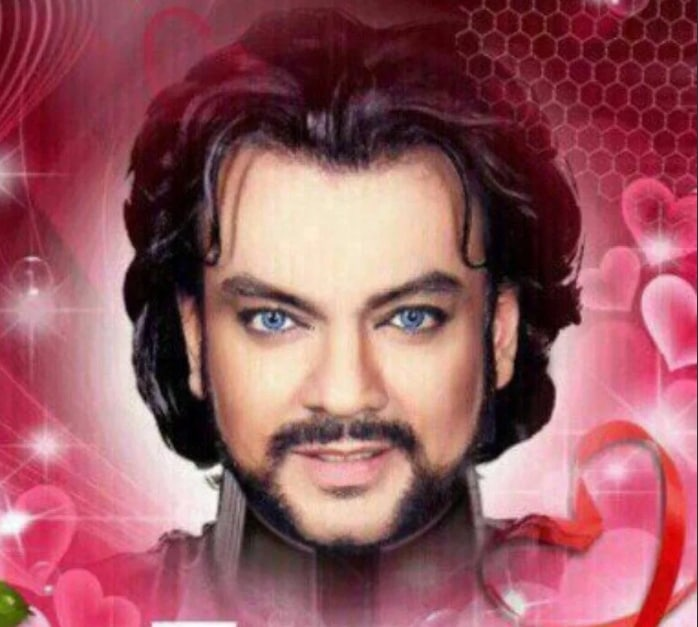